## Homework Assignment

A 2500 MWth PWR unit is to be operated in an equilibrium reload cycle fashion employing an 18-month refueling cycle with an anticipated 90% capacity factor. Use the following data to determine:

a) Beginning-of-cycle (BOC) core average reactivity required  
b) Number of burnable poison (BP) rods, if any, required

Assume total core loading of 65 MTU and no control rods are inserted at full power.

- The rate of change of core reactivity with core burnup (BU) without BP rods is  
  \begin{equation*}
  \frac{d\rho}{dBU} = -0.0012 \, \frac{\% \Delta \rho}{\text{MWD/T}}
  \end{equation*}

- BP reactivity worth at BOC: $ \rho_{BP} = 0.004\% \Delta \rho $ per BP rod
- Rate of change of BP reactivity with core BU  
  \begin{equation*}
  \frac{d\rho}{dBU} = -0.000085 \rho_{BP} \, \frac{\% \Delta \rho}{\text{MWD/T}}
  \end{equation*}

- Soluble boron reactivity worth = 0.01% $ \Delta \rho $ / ppm
- Moderator temperature coefficient (MTC) = 0 at 1800 ppm soluble boron


In [194]:
from IPython.display import display, Math
import sympy as sp
import math

# Defining the constants and parameters
thermal_power = 2500  # in MWth
refueling_cycle = 18  # in months
capacity_factor = 0.90  # 
core_loading = 65  # in MTU
d_rho_d_burnup_no_bp = -0.0012  # in %Δρ per MWD/T without BP rods
bp_reactivity_worth = 0.004  # %Δρ per BP rod at BOC
d_rho_d_burnup_bp = -0.000085  # %Δρ per MWD/T per BP rod
boron_reactivity_worth = 0.01  # %Δρ per ppm soluble boron
mtc_at_1800_ppm = 0  # Moderator temperature coefficient at 1800 ppm

# Compute Burnup
Bu_max = thermal_power * refueling_cycle * 30 * capacity_factor / core_loading # MWd/tU
print(Bu_max)

18692.30769230769


In [195]:
# Calculate the BOC reactivity required
core_excess_at_EOC = 0
boc_reactivity = core_excess_at_EOC - d_rho_d_burnup_no_bp*Bu_max
print(boc_reactivity)

22.43076923076923


In PWR $\rho_0$ is compensated by CR, Boron and BP rods.  

Control rods not considered at full power.  

The upper limit for Boron is 1800ppm for having a negative temperature coefficent.  

In [196]:
boron = 1800  # ppm
delta_rho_B = boron_reactivity_worth * boron
print(delta_rho_B)

18.0


In [197]:
# Add what is missing to get reactivity of BP 0 at EOC with BP rods
to_add = boc_reactivity - delta_rho_B

In [198]:
import numpy as np

# Line for Boron reactivity worth
Bu = np.linspace(0, Bu_max, 100)
B_reactivity = -(delta_rho_B + d_rho_d_burnup_bp*delta_rho_B*Bu)
B_reactivity = [np.min([0, x]) for x in B_reactivity]
# find first 0
idx = min(np.where(np.array(B_reactivity) == 0)[0])

B_reactivity_post = np.zeros(len(B_reactivity))
# translate B_reactivity to Bu
for i in range(len(B_reactivity)):
    if i < idx:
        B_reactivity_post[i] = B_reactivity[0]
    else:
        B_reactivity_post[i] = B_reactivity[i-idx]
        
B_reactivity = B_reactivity_post

In [199]:
n_BP_rods = 0
reactivity_BP_rods = n_BP_rods * bp_reactivity_worth

print(reactivity_BP_rods)

0.0


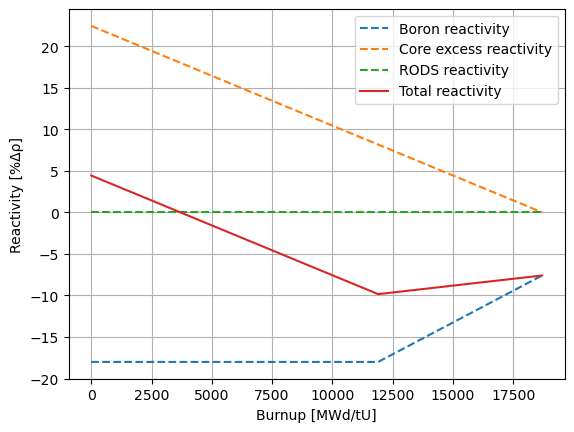

In [200]:
RODS_reactivity = -(reactivity_BP_rods + d_rho_d_burnup_bp*reactivity_BP_rods*Bu)
RODS_reactivity = [np.min([0, x]) for x in RODS_reactivity]

# Line for core excess reactivity
core_excess = boc_reactivity + d_rho_d_burnup_no_bp*Bu

# Total reactivity
total_reactivity = B_reactivity + core_excess + RODS_reactivity


# Plot both
import matplotlib.pyplot as plt
import numpy as np

plt.plot(Bu, B_reactivity, '--', label='Boron reactivity')
plt.plot(Bu, core_excess, '--', label='Core excess reactivity')
plt.plot(Bu, RODS_reactivity, '--', label='RODS reactivity')
plt.plot(Bu, total_reactivity, label='Total reactivity')
plt.xlabel('Burnup [MWd/tU]')
plt.ylabel('Reactivity [%Δρ]')
plt.legend()
plt.grid()
plt.show()
